<a href="https://colab.research.google.com/github/Polae-Bear-200/DAI101-23117049-assignment2-GarvJain/blob/main/daiassign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/tips (data for regression problem).csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df = df.drop_duplicates()

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
df['sex'] = label_encoder.fit_transform(df['sex'])
df['time'] = label_encoder.fit_transform(df['time'])
df['day'] = label_encoder.fit_transform(df['day'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

<ipython-input-6-38e15ee951fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = label_encoder.fit_transform(df['sex'])
<ipython-input-6-38e15ee951fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = label_encoder.fit_transform(df['time'])
<ipython-input-6-38e15ee951fc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

check the relationship between total_bill and tip:

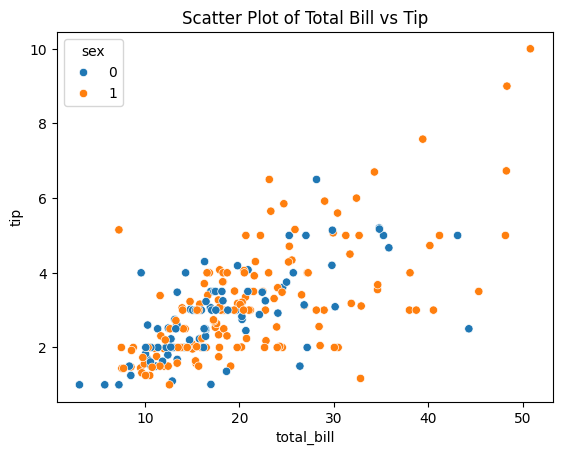

In [7]:
sns.scatterplot(x='total_bill', y='tip', data=df,hue ="sex")
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()


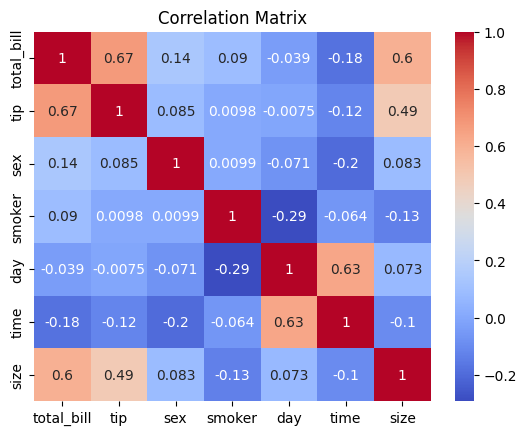

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

total_bill and tip have a strong positive correlation (0.68) same with size and tip

In [9]:
from statsmodels.stats.diagnostic import linear_rainbow
X = df[['total_bill', 'size']]  # Choose numerical features for predictors
X = sm.add_constant(X)  # Add a constant for intercept
y = df['tip']  # Define target variable


model = sm.OLS(y, X).fit()

rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow test statistic: {rainbow_statistic}, p-value: {rainbow_p_value}")


if rainbow_p_value > 0.05:
    print("The linearity assumption holds (p > 0.05).")
else:
    print("The linearity assumption may be violated (p <= 0.05).")

Rainbow test statistic: 1.2653810872757194, p-value: 0.0997456046936553
The linearity assumption holds (p > 0.05).


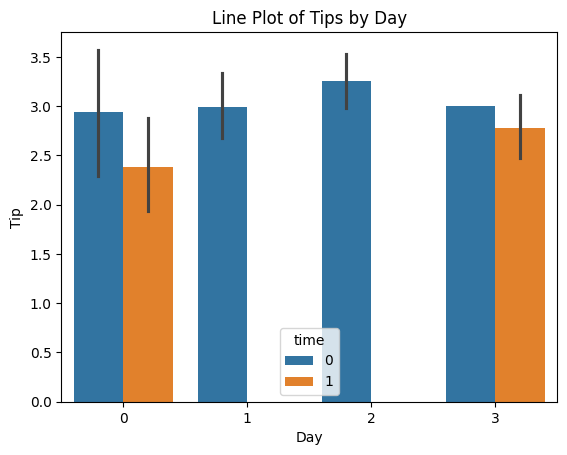

In [10]:
sns.barplot(x='day', y='tip', data=df, hue='time')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Line Plot of Tips by Day')
plt.show()

In [11]:
X = df.drop('tip', axis=1)
y = df['tip']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    percentage_accuracy = 100 - (100 * (abs(y_test - y_pred) / y_test).mean())

    return mse, r2, percentage_accuracy

In [59]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=6),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=21),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [60]:

from sklearn.model_selection import cross_val_score
results = {}

# evaluting through each model
for name, model in models.items():
    mse, r2, percentage_accuracy = train_evaluate_model(model, X_train, X_test, y_train, y_test)

    results[name] = {'MSE': mse, 'R2': r2 , 'Percentage_Accuracy':percentage_accuracy}#storing the results as a dictionary


df_results = pd.DataFrame(results).T  # transpose to get models as rows
# Sort by MSE (lower is better)
df_results_sorted_by_mse = df_results.sort_values(by="MSE", ascending=True)
print("\nSorted by MSE:")
print(df_results_sorted_by_mse)

# Sort by R² (higher is better)
df_results_sorted_by_r2 = df_results.sort_values(by="R2", ascending=False)
print("\nSorted by R²:")
print(df_results_sorted_by_r2)



Sorted by MSE:
                                MSE        R2  Percentage_Accuracy
Lasso Regression           1.134537  0.454650            67.921322
Ridge Regression           1.163879  0.440545            67.831807
Linear Regression          1.165063  0.439976            67.822697
Random Forest              1.176657  0.434404            65.825834
Decision Tree              1.229002  0.409242            64.737459
Support Vector Regression  1.336510  0.357565            68.980462
K-Nearest Neighbors        1.455022  0.300599            63.722105

Sorted by R²:
                                MSE        R2  Percentage_Accuracy
Lasso Regression           1.134537  0.454650            67.921322
Ridge Regression           1.163879  0.440545            67.831807
Linear Regression          1.165063  0.439976            67.822697
Random Forest              1.176657  0.434404            65.825834
Decision Tree              1.229002  0.409242            64.737459
Support Vector Regression  1.33

now by analysing the output we can say linear, lasso and ridge are good , as they have low mse and high r2 , now we will tune the hyperparameters
using cross validiation for lasso and svr


first we will tune parameters of ridge

In [48]:
from sklearn.linear_model import RidgeCV
alphas = [0.1, 1.0, 10.0,50.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')

mse, r2, percentage_accuracy = train_evaluate_model(ridge_cv, X_train, X_test, y_train, y_test)

# Display results
print("Best alpha:", ridge_cv.alpha_)
print("Mean Squared Error:", mse)
print("R² score:", r2)
print("Percentage Accuracy:", percentage_accuracy)

Best alpha: 50.0
Mean Squared Error: 1.1420021637695066
R² score: 0.4510614971829525
Percentage Accuracy: 67.97196793992137


trying alpha in range 40 - 80

In [49]:
from sklearn.linear_model import RidgeCV
alphas = [40.0, 50.0,60.0, 70.0, 80.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')

mse, r2, percentage_accuracy = train_evaluate_model(ridge_cv, X_train, X_test, y_train, y_test)

# Display results
print("Best alpha:", ridge_cv.alpha_)
print("Mean Squared Error:", mse)
print("R² score:", r2)
print("Percentage Accuracy:", percentage_accuracy)

Best alpha: 60.0
Mean Squared Error: 1.1406627723516591
R² score: 0.45170531690845306
Percentage Accuracy: 67.96644917763965


Fine tuning hyperparameters for lasso regression

In [54]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, random_state=42)

# Train and evaluate the model
mse, r2, percentage_accuracy = train_evaluate_model(lasso_cv, X_train, X_test, y_train, y_test)

# Display results
print("Best alpha:", lasso_cv.alpha_)
print("Mean Squared Error:", mse)
print("R² score:", r2)
print("Percentage Accuracy:", percentage_accuracy)

Best alpha: 0.06198619991486256
Mean Squared Error: 1.1286249386157274
R² score: 0.4574916723443755
Percentage Accuracy: 68.04100329820258


now for linear regression

In [62]:
from sklearn.preprocessing import StandardScaler
def train_evaluate_linear(X_train, X_test, y_train, y_test, hyperparameters):
    # Iterate through all combinations of hyperparameters
    best_mse = float('inf')
    best_r2 = -float('inf')
    best_accuracy = -float('inf')
    best_params = None

    for params in hyperparameters:
        # Extract hyperparameters
        standardize = params['standardize']
        fit_intercept = params['fit_intercept']

        # Standardize the data if needed
        if standardize:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        model = LinearRegression(fit_intercept=fit_intercept)
        mse, r2, percentage_accuracy = train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

        # Store the best model and hyperparameters based on MSE
        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_accuracy = percentage_accuracy
            best_params = params

    # Print the best results
    print("Best Parameters:", best_params)
    print("Best Mean Squared Error:", best_mse)
    print("Best R² score:", best_r2)
    print("Best Percentage Accuracy:", best_accuracy)

# Define a hyperparameter matrix for experimentation
hyperparameters = [
    {'standardize': True, 'fit_intercept': True},
    {'standardize': True, 'fit_intercept': False},
    {'standardize': False, 'fit_intercept': True},
    {'standardize': False, 'fit_intercept': False}
]

# Train and evaluate the linear regression model with the hyperparameter matrix
train_evaluate_linear(X_train, X_test, y_train, y_test, hyperparameters)

Best Parameters: {'standardize': False, 'fit_intercept': True}
Best Mean Squared Error: 1.165063407664627
Best R² score: 0.43997640023786366
Best Percentage Accuracy: 67.82269729923372


so we can say best is lasso